# <center> Stromnetz Graz Smart Meter Analysis

In [1]:
# Imports for plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.gridspec as gridspec
# Custom Modules
from SMIT.application import Application

## Setup

In [5]:
app = Application()                       # Create user from user_data file
app.os_tools.scrapandmove()    # Update data from stromnetzgraz website

#print(app.scrape)
# Create dataframes with all data
df_day = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['day_meter'])
df_night = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['night_meter'])

Application init
################
TOML added to self
##################
TOML added to self
##################
folder_init loaded
##################
folder checked: ./csv_raw/daily
folder checked: ./csv_raw/15min
folder checked: ./log
folder checked: ./csv_workdir/daily
folder checked: ./csv_workdir/15min
folder checked: ./config


Modules loaded
gui - Module 'SMIT.userinput.UiTools'
rsa - Module 'SMIT.rsahandling.RsaTools'
toml_tools - Module 'SMIT.filehandling.TomlTools'
os_tools - Module 'SMIT.filehandling.OsInterface'
persistence - Module 'SMIT.filepersistence.Persistence'
scrape - Module 'SMIT.scrapedata.Webscraper'
##############
Modules added to self
#####################
Most recent data already downloaded


In [6]:
df_day.tail()

,date,zaehlerstand,verbrauch
240,2023-08-23,0.000,4590.667
241,2023-08-24,0.000,3639.667
242,2023-08-25,3210.209,3766.000
243,2023-08-26,3215.948,5739.000
244,2023-08-27,3219.726,3778.000


## Analysis

/tmp/ipykernel_38429/1900224827.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0, :2])


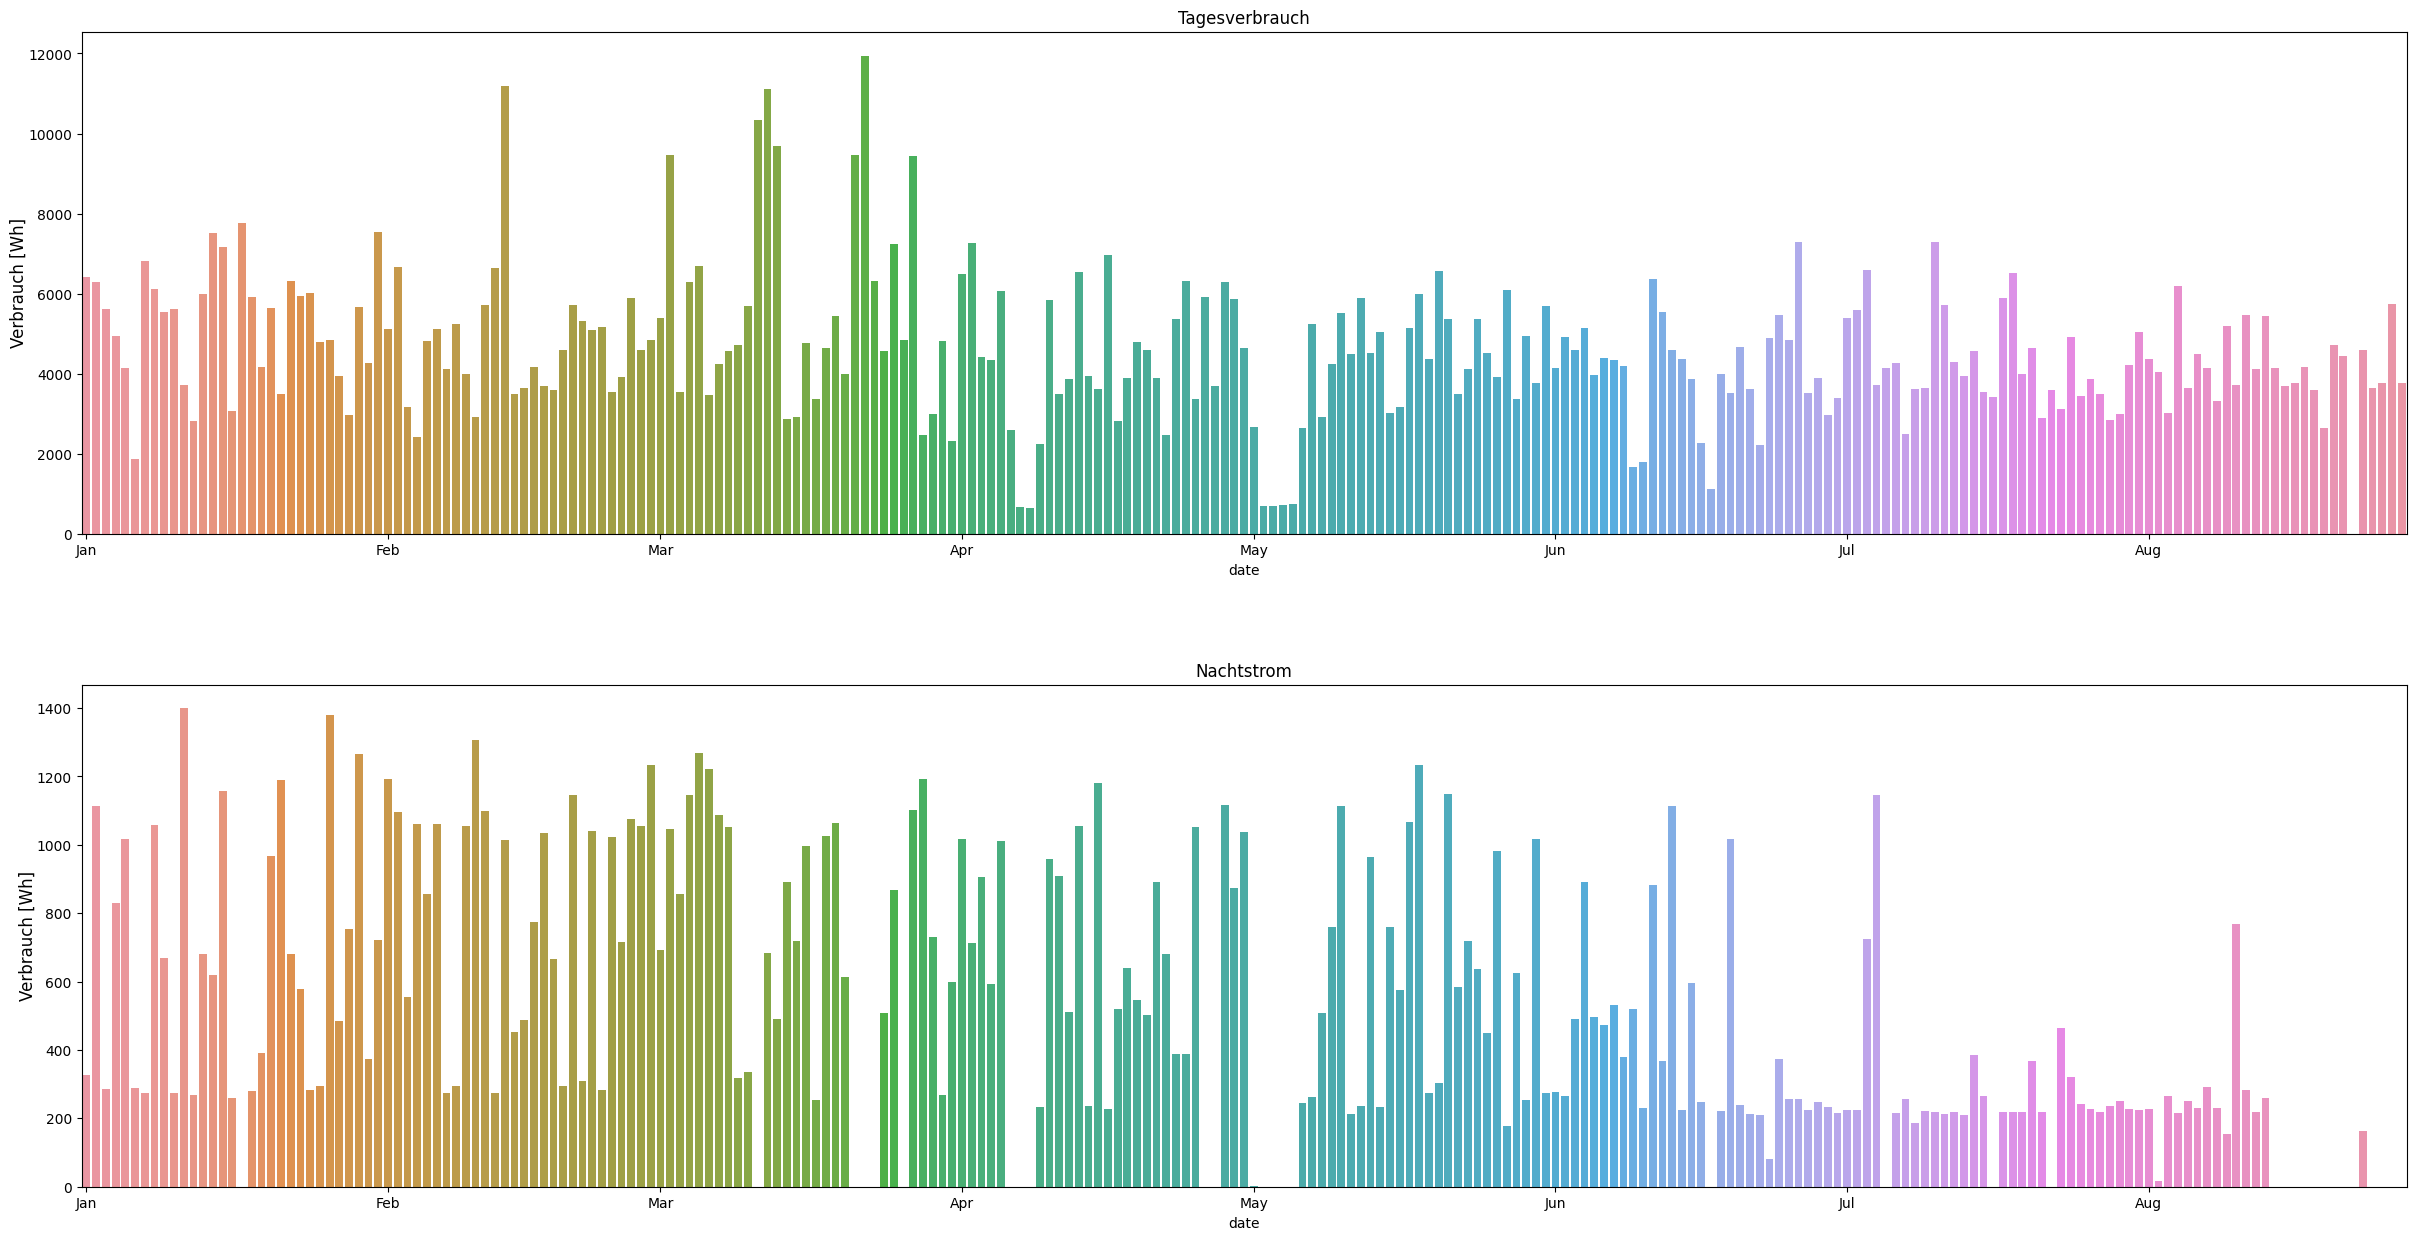

In [7]:
fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
gs.update(wspace = 0.1, hspace = 0.3)

### AX1 ###
ax1 = plt.subplot(gs[0, :2])
sns.barplot(data=df_day,
            x='date',
            y='verbrauch')
ax1.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax1.set_title('Tagesverbrauch')

### AX2 ###
ax2 = plt.subplot(gs[1, :2])
sns.barplot(data=df_night,
            x='date',
            y='verbrauch')
ax2.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax2.set_title('Nachtstrom')

### Draw Plot ###
plt.show()